In [1]:
# Importamos las librerías necesarias

import pandas as pd  # Librería para manipulación y análisis de datos
import numpy as np  # Librería para operaciones numéricas y matemáticas
import matplotlib.pyplot as plt  # Librería para crear gráficos
import seaborn as sns  # Librería para visualización de datos, basada en matplotlib
from sklearn import linear_model  # Módulo de Scikit-learn para realizar modelos de regresión lineal


In [2]:
# Importar los datos como un DataFrame de Pandas (df)
# Leemos el archivo CSV que contiene los datos y lo almacenamos en la variable 'df'
df = pd.read_csv("data/SLR_House_data.csv")

# Mostramos el DataFrame para ver los primeros registros y verificar que los datos se han cargado correctamente
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


## Diagrama de dispersión - Correlación

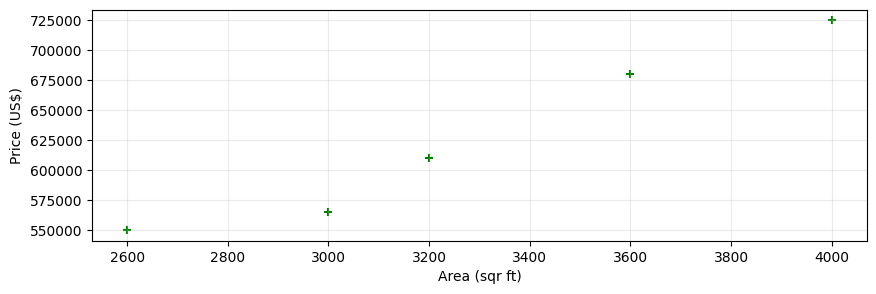

In [ ]:
# Configuración del tamaño de la figura del gráfico
plt.figure(figsize=(10, 3))

# Creamos un diagrama de dispersión para visualizar la relación entre el área y el precio
# 'df.area' representa el eje x (área) y 'df.price' el eje y (precio)
# 'color' define el color de los puntos y 'marker' el estilo del marcador
plt.scatter(df.area, df.price, color='green', marker='+')

plt.grid(alpha=0.25)

# Etiquetas de los ejes para proporcionar contexto al gráfico
plt.xlabel('Area (sqr ft)')  # Etiqueta para el eje x
plt.ylabel('Price (US$)')    # Etiqueta para el eje y

plt.show()

## Matriz de correlación - Correlation Matrix

In [20]:
# Calculamos la matriz de correlación para el DataFrame
# La matriz de correlación muestra la relación entre las variables numéricas en el conjunto de datos
correlation_matrix = df.corr()

# Mostrar la matriz de correlación en la consola
print(correlation_matrix)

           area     price
area   1.000000  0.978994
price  0.978994  1.000000


<Axes: >

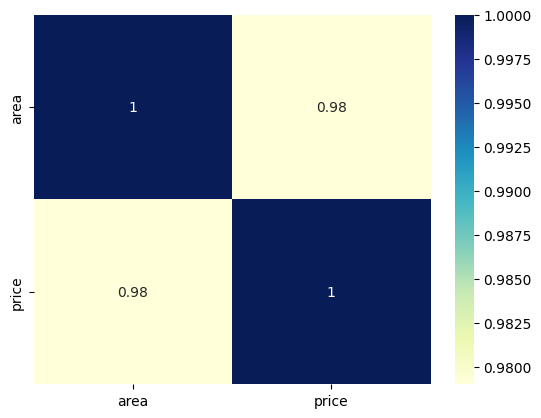

In [21]:
# Generamos un mapa de calor para visualizar la matriz de correlación
# 'annot=True' muestra los valores de correlación en cada celda del mapa de calor
# 'cmap' define la paleta de colores para el gráfico (en este caso, "YlGnBu" para un gradiente de amarillo a azul)
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

# LINEAR REGRESSION MODEL

In [7]:
# Crear una instancia del modelo de regresión lineal
reg = linear_model.LinearRegression()

# Ajustar el modelo a los datos. 'df[['area']]' es el conjunto de características (en este caso, el área),
# y 'df.price' es la variable objetivo (el precio).
reg.fit(df[['area']], df.price)

LinearRegression()

In [22]:
# Crear un DataFrame con el valor de entrada
# 3300 es un ejemplo que representa un inmueble de 3300 pies cuadrados
input_data = pd.DataFrame([[3300]], columns=['area'])

# Hacer la predicción utilizando el modelo de regresión lineal previamente entrenado
prediction = reg.predict(input_data)

# Mostrar el resultado de la predicción
print(prediction)

# Imprimir un mensaje indicando el precio estimado para el inmueble de 3300 pies cuadrados
print(f"El precio para un inmueble de 3300 pies cuadrados es ${prediction[0]:,.2f}")

[628715.75342466]
El precio para un inmueble de 3300 pies cuadrados es $628,715.75


## Analysis

##### Formula de regresión lineal simple: y=m*x+b

y = Dependent variable - Response - Outcome <br>
x = Independent variable - Predictor <br>
m = coeficient <br>
b = intercept

In [23]:
# Obtenemos el coeficiente de la regresión lineal
# 'm' representa la pendiente de la recta (coeficiente)
m = reg.coef_  

# Obtenemos el término independiente de la regresión lineal
# 'b' representa el intercepto de la recta (valor en el eje y cuando x=0)
b = reg.intercept_  

##### Ejemplo de Cálculo 1

In [24]:
# Calculamos el precio estimado para un inmueble de 3300 pies cuadrados
# Usamos la fórmula de la recta: precio = m * área + b
precio1 = m * 3300 + b

# Mostramos el precio estimado
precio1

array([628715.75342466])

##### Ejemplo de Cálculo 2

In [25]:
# Calculamos el precio estimado para un inmueble de 6500 pies cuadrados
# Utilizamos la misma fórmula de la recta: precio = m * área + b
precio2 = m * 6500 + b

# Mostramos el precio estimado
precio2


array([1063236.30136986])

## Predicted Prices for new values (csv)

In [27]:
# Importar el conjunto de datos con los valores a predecir
# Cargamos un archivo CSV que contiene las áreas de los inmuebles para los cuales queremos hacer predicciones
d = pd.read_csv("data/SLR_To_Predict.csv")

# Mostramos las primeras tres filas del DataFrame para verificar los datos cargados
d.head(3)

,area
0,1000
1,1500
2,2300


In [28]:
# Crear una variable que contenga los valores predichos para el conjunto de datos 'd'
# Utilizamos el modelo de regresión lineal previamente entrenado para hacer predicciones
p = reg.predict(d)

In [29]:
# Agregar los valores predichos al conjunto de datos 'd'
# Creamos una nueva columna llamada 'predicted_prices' para almacenar las predicciones
d['predicted_prices'] = p

# Mostramos las primeras cinco filas del DataFrame actualizado para verificar la inclusión de los precios predichos
d.head(5)

,area,predicted_prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [30]:
# Exportar los datos resultantes a un archivo CSV sin incluir la columna de índice
# Guardamos el DataFrame 'd', que ahora incluye los precios predichos, en un nuevo archivo llamado 'prediction.csv'
d.to_csv("data/prediction.csv", index=False)

## Linear Regression graph

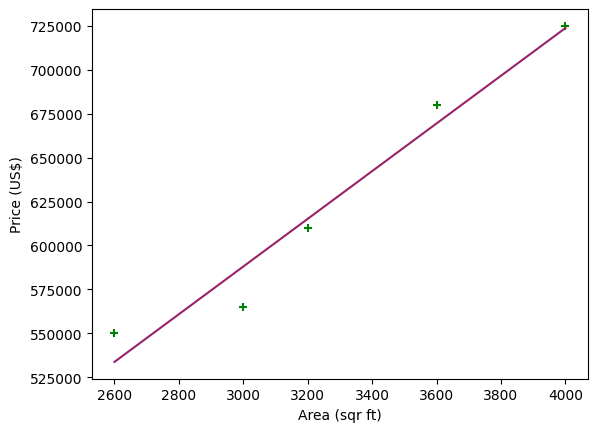

In [31]:
# Crear un diagrama de dispersión para visualizar la relación entre el área y el precio
# 'df.area' representa el eje x (área) y 'df.price' el eje y (precio)
# 'color' define el color de los puntos y 'marker' el estilo del marcador
plt.scatter(df.area, df.price, color='green', marker='+')

# Etiquetas de los ejes para proporcionar contexto al gráfico
plt.xlabel('Area (sqr ft)')  # Etiqueta para el eje x
plt.ylabel('Price (US$)')    # Etiqueta para el eje y

# Dibujar la línea de regresión sobre el gráfico de dispersión
# Usamos 'reg.predict' para predecir los precios basados en los valores de área en el DataFrame 'df'
# 'color' define el color de la línea de regresión
plt.plot(df.area, reg.predict(df[['area']]), color='#992266')